<h1 align="center">W203 Lab 3: Covid 19</h1>
<h4 align="center">Blake Allen, Sam Shih, Mike Fan</h4>
<h4 align="center">Summer 2020 Section 1 </h4>

# 1. Introduction

The dataset includes (1) variables representing the spread of the disease, (2) variables representing state-level policy responses, and (3) general state-level characteristics.

## Research Question of Interest

# 2. Exploratory Data Analysis (EDA)

## Data Review

In [5]:
getwd()

[1] "C:/Users/micha/Desktop/lab_3-master"

In [9]:
library(plyr)
library(dplyr)
library(ggplot2)
library(summarytools)
library(coin)
library(effsize)
library(tidyverse)
library(lsr)
library(corrplot)
library(rstatix)
library(BSDA)
library(cowplot)
library(ggrepel)
library(stargazer)
library(knitr)
library(kableExtra)
library(corrr)
library(ggcorrplot)
library(ggfortify)
library(lmtest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(summarytools): there is no package called ‘summarytools’


In [23]:
install.packages("latticeExtra")
install.packages("DAAG")
library(DAAG)

Warning message:
“package ‘latticeExtra’ is not available (for R version 3.5.2)”
Warning message:
“dependency ‘latticeExtra’ is not available”
Warning message in install.packages("DAAG"):
“installation of package ‘DAAG’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Warning message in file.create(f.tg):
“cannot create file '/usr/local/Cellar/r/3.5.2_2/lib/R/doc/html/packages.html', reason 'Permission denied'”
Warning message in make.packages.html(.Library):
“cannot update HTML package index”


ERROR: Error in library(DAAG): there is no package called ‘DAAG’


In [75]:
df_covid = read.csv("covid-19_dist0720_enriched.csv")

#head(df_covid)

#combine Arizona & arizona data
for (i in 4:ncol(df_covid)){
    a_val = df_covid[c(3), i]
    b_val = df_covid[c(4), i]
    if (a_val != b_val){
        #print(i)
        #combine when values differ such as Total cases, death, etc. 
         df_covid[c(3), i] = df_covid[c(3), i] + df_covid[c(4), i]
    }
}

#remove extra arizona row
df_covid <- df_covid[-c(4), ]

head(df_covid)
summary(df_covid)
str(df_covid)

,party2016,party2016_votepercent,State,Total.Cases,Total.Death,Death_100k,CasesInLast7Days,CasesInLast7Days_100k,RatePer100000,totalTestResults,⋯,Percent_under_poverty_line,Percent.at.risk.for.serious.illness.due.to.COVID,All.cause.deaths.2018,all_death_rate18,Children.0.18,Adults.19.25,Adults.26.34,Adults.35.54,Adults.55.64,X65.
,<fct>,<dbl>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Republican,0.6208,Alabama,44909,1009,20.6,9804,200.6,918.8,449886,⋯,16.8,43.1,54352,0.011119770,0.24,0.09,0.12,0.25,0.14,0.17
2,Republican,0.5128,Alaska,1138,16,2.2,284,38.5,154.3,122732,⋯,10.9,32.8,4453,0.006038474,0.27,0.09,0.13,0.26,0.13,0.12
3,Republican,0.4867,Arizona,83376,1538,25.2,28038,391.0,1367.7,604362,⋯,14.0,39.1,59282,0.008266164,0.24,0.09,0.12,0.24,0.12,0.18
4,Republican,0.4867,arizona,14713,271,25.2,28038,391.0,1367.7,604362,⋯,14.0,39.1,59282,0.008266164,0.24,0.09,0.12,0.24,0.12,0.18
5,Republican,0.6057,Arkansas,23814,287,9.5,4504,149.4,790.2,338893,⋯,17.2,43.5,32336,0.010729223,0.25,0.09,0.12,0.25,0.13,0.17
6,Democrat,0.6173,California,260155,6331,16.0,53722,135.8,657.7,4680138,⋯,12.8,33.3,268818,0.006795705,0.24,0.09,0.14,0.26,0.12,0.14


,party2016,party2016_votepercent,State,Total.Cases,Total.Death,Death_100k,CasesInLast7Days,CasesInLast7Days_100k,RatePer100000,totalTestResults,⋯,Percent_under_poverty_line,Percent.at.risk.for.serious.illness.due.to.COVID,All.cause.deaths.2018,all_death_rate18,Children.0.18,Adults.19.25,Adults.26.34,Adults.35.54,Adults.55.64,X65.
,<fct>,<dbl>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Republican,0.6208,Alabama,44909,1009,20.6,9804,200.6,918.8,449886,⋯,16.8,43.1,54352,0.011119770,0.24,0.09,0.12,0.25,0.14,0.17
2,Republican,0.5128,Alaska,1138,16,2.2,284,38.5,154.3,122732,⋯,10.9,32.8,4453,0.006038474,0.27,0.09,0.13,0.26,0.13,0.12
3,Republican,0.4867,Arizona,98089,1809,25.2,28038,391.0,1367.7,604362,⋯,14.0,39.1,59282,0.008266164,0.24,0.09,0.12,0.24,0.12,0.18
5,Republican,0.6057,Arkansas,23814,287,9.5,4504,149.4,790.2,338893,⋯,17.2,43.5,32336,0.010729223,0.25,0.09,0.12,0.25,0.13,0.17
6,Democrat,0.6173,California,260155,6331,16.0,53722,135.8,657.7,4680138,⋯,12.8,33.3,268818,0.006795705,0.24,0.09,0.14,0.26,0.12,0.14
7,Democrat,0.4816,Colorado,34065,1701,299.0,2043,35.9,598.1,350717,⋯,9.6,31.3,38526,0.006764212,0.24,0.09,0.14,0.26,0.13,0.14


      party2016  party2016_votepercent        State     Total.Cases    
 Democrat  :21   Min.   :0.4554        Alabama   : 1   Min.   :   939  
 Republican:30   1st Qu.:0.4979        Alaska    : 1   1st Qu.: 11415  
                 Median :0.5545        Arizona   : 1   Median : 31353  
                 Mean   :0.5560        Arkansas  : 1   Mean   : 56416  
                 3rd Qu.:0.5979        California: 1   3rd Qu.: 68003  
                 Max.   :0.9048        Colorado  : 1   Max.   :398828  
                                       (Other)   :45                   
  Total.Death        Death_100k     CasesInLast7Days CasesInLast7Days_100k
 Min.   :   16.0   Min.   :  1.30   Min.   :   51    Min.   :  8.10       
 1st Qu.:  280.5   1st Qu.:  9.50   1st Qu.:  824    1st Qu.: 36.65       
 Median :  820.0   Median : 18.00   Median : 3175    Median : 51.80       
 Mean   : 2542.0   Mean   : 42.32   Mean   : 7463    Mean   : 91.56       
 3rd Qu.: 2776.5   3rd Qu.: 46.45   3rd Qu.: 5718

'data.frame':	51 obs. of  39 variables:
 $ party2016                                                     : Factor w/ 2 levels "Democrat","Republican": 2 2 2 2 1 1 1 1 1 2 ...
 $ party2016_votepercent                                         : num  0.621 0.513 0.487 0.606 0.617 ...
 $ State                                                         : Factor w/ 52 levels "Alabama","Alaska",..: 1 2 4 5 6 7 8 9 10 11 ...
 $ Total.Cases                                                   : int  44909 1138 98089 23814 260155 34065 46717 12348 10482 197076 ...
 $ Total.Death                                                   : int  1009 16 1809 287 6331 1701 4335 512 559 3731 ...
 $ Death_100k                                                    : num  20.6 2.2 25.2 9.5 16 ...
 $ CasesInLast7Days                                              : int  9804 284 28038 4504 53722 2043 511 1095 266 66984 ...
 $ CasesInLast7Days_100k                                         : num  200.6 38.5 391 149.4 135.8 ...

## Introduction

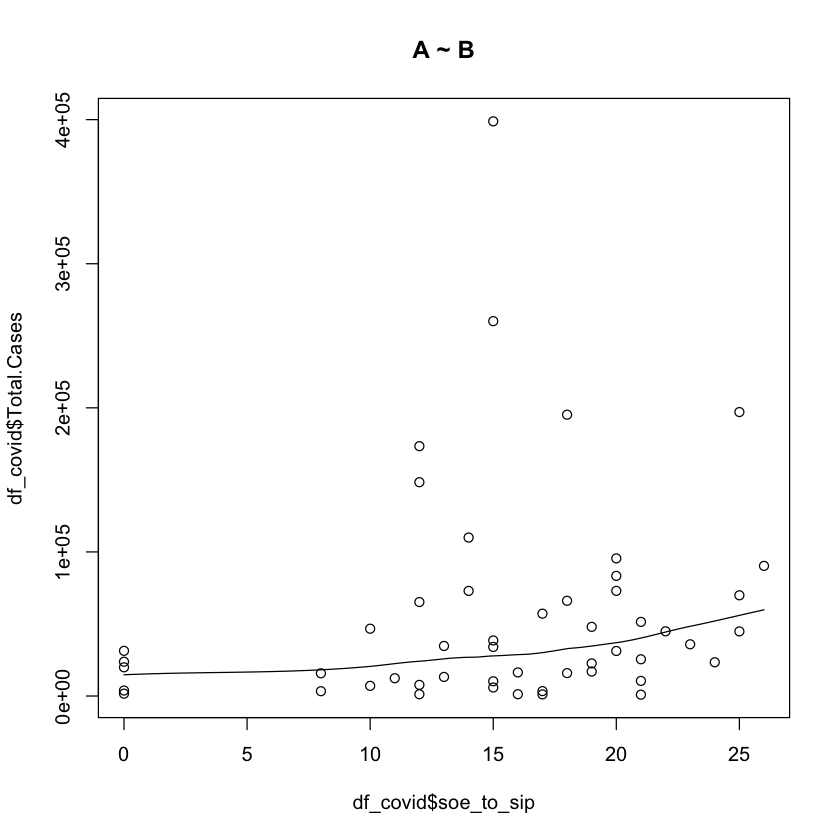

In [49]:
scatter.smooth(x=df_covid$soe_to_sip, y=df_covid$Total.Cases, main="A ~ B")  # scatterplot


In [50]:
linearMod <- lm(Total.Cases ~ soe_face_mask + soe_to_sip, data=df_covid)  # build linear regression model on full data
print(linearMod)
summary(linearMod)  # model summary



Call:
lm(formula = Total.Cases ~ soe_face_mask + soe_to_sip, data = df_covid)

Coefficients:
  (Intercept)  soe_face_mask     soe_to_sip  
       6734.7          563.5         1682.9  




Call:
lm(formula = Total.Cases ~ soe_face_mask + soe_to_sip, data = df_covid)

Residuals:
   Min     1Q Median     3Q    Max 
-65366 -42383 -21108   9595 343748 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)     6734.7    30282.2   0.222    0.825
soe_face_mask    563.5      426.5   1.321    0.193
soe_to_sip      1682.9     1556.9   1.081    0.285

Residual standard error: 74160 on 48 degrees of freedom
Multiple R-squared:  0.06252,	Adjusted R-squared:  0.02346 
F-statistic:   1.6 on 2 and 48 DF,  p-value: 0.2124


In [51]:
modelSummary <- summary(linearMod)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
beta.estimate <- modelCoeffs["Total.Cases", "Estimate"]  # get beta estimate for speed
std.error <- modelCoeffs["Total.Cases", "Std. Error"]  # get std.error for speed
t_value <- beta.estimate/std.error  # calc t statistic
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(df_covid))  # calc p Value
f_statistic <- linearMod$fstatistic[1]  # fstatistic
f <- summary(linearMod)$fstatistic  # parameters for model p-value calc
model_p <- pf(f[1], f[2], f[3], lower=FALSE)
t_value
p_value
f_statistic
model_p

ERROR: Error in modelCoeffs["Total.Cases", "Estimate"]: subscript out of bounds


# 3. Modeling Process

## Overview

## Dependent Variable

## Model 1

### Independent Variable Selection

### Model Execution and Interpretation

### Model Diagnostics

## Model 2

### Independent Variable Selection

### Model Execution and Interpretation

### Model Diagnostics

## Model 3

### Independent Variable Selection

### Model Execution and Interpretation

### Model Diagnostics

# 4. Assessment of the CLM Assumptions

## MLR.1: Linearity in Parameters

## MLR.2: Random Sampling

## MLR.3: No Perfect Collinearity

## MLR.4: Zero Conditional Mean

## MLR.5: Homoskedasticity

## MLR.6: Normality of Errors

# 5. Regression Table

## Model Comparison Summary

# 6. Omitted Variables Discussion

# 7. Conclusion